In [2]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
from mpl_chord_diagram import chord_diagram
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from matplotlib import patches as mpatches
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
import matplotlib as mpl
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [3]:
def plot_segmentation_polygon(adata,
                              polygon_file,
                              region_subset,
                              cell_subset,
                              color,
                              annotation,
                              xlim_max,
                              ylim_max,
                              save,
                              save_path,
                              linewidth = 0.1,
                              color_is_gene_exp =False,
                              cell_id_col = 'CellID',
                             ):
    
    import ast
    cmap = mpl.cm.RdBu_r
    normalize = mpl.colors.Normalize(vmin=-2, vmax=2)
    polygons = pd.read_csv(polygon_file)
    polygons = polygons.set_index('0')

In [4]:
import anndata as ad

In [834]:
X = pd.read_csv("expr_R1.csv", index_col=0)
obs = pd.read_csv("obs_R1.csv", index_col=0)
var = pd.read_csv("var_R1.csv", index_col=0)
spatial = pd.read_csv("spatial_R1.csv", index_col=0)

In [835]:
X.values

array([[0.27027885, 0.98590243, 1.06402367, ..., 0.40248425, 1.19296951,
        0.84875994],
       [0.28454849, 0.99763753, 2.45013004, ..., 0.77410152, 1.18362145,
        0.74066354],
       [0.29888031, 1.00377038, 1.66849294, ..., 0.68434428, 0.82251754,
        0.77888882],
       ...,
       [0.3280198 , 0.97641922, 0.89704075, ..., 0.27765707, 0.48123287,
        0.625395  ],
       [0.33726455, 0.98782568, 1.54818409, ..., 0.34627231, 0.76503326,
        0.82067084],
       [0.31216889, 0.98893084, 1.46004752, ..., 0.20312562, 0.79397895,
        0.61614024]])

In [836]:
adata = ad.AnnData(X=X.values, obs=obs, var=var)

In [837]:
adata.obsm["spatial"] = spatial.values

In [ ]:
sq.pl.spatial_scatter(adata, shape=None, color="subtype", size=10)

In [843]:
adata=adata[adata.obs.subtype !='Tumor']

KeyError: 'Could not find key interaction_annotations_colors in .var_names or .obs.columns.'

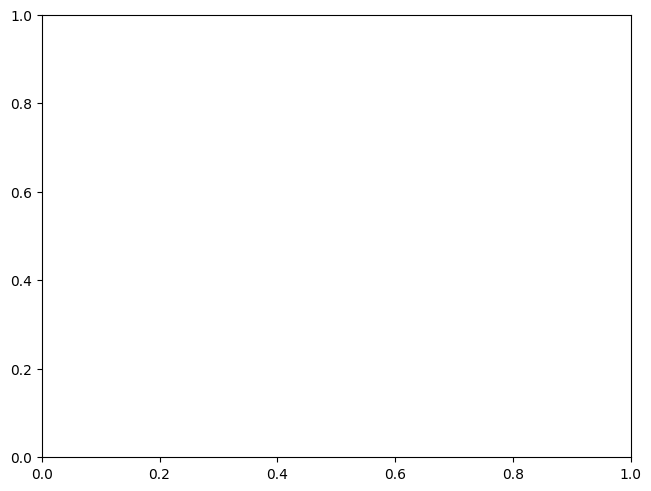

In [608]:
sq.pl.spatial_scatter(adata, shape=None, color="interaction_annotations_colors", size=10)

In [775]:
color_interaction_anno = {
   "Tumor":'#EC8C52',"Macrophage":'#019092',"Endothelial":'#98FB98',"CD8+CD69+ T":'#8DA0CB',"B cell":'#355BA7',"CD4+CD45RO+ T":'#09113E',"Normal Epi":'#666666',"CD8+ Tex":'#4292C6',"other CD8+ T":'#FDB462',
  "CAF":'#9ABF75', "CD4+CCR7+ T":'#FCD31B',"HEVs":'#EA2865',"CD4+HLA-DR+ T":'#1E90FF',"ILC2":'#8A2BE2',"GZMB+ T":'#984C42',"CD8+CXCL13+Ki67+ T":'#D8DADC',"CD4+ Treg":'#3B8FC9',"NK":'#665296',"Mast cell":'#56B195',"CD8+ Tstem":'#EB2533',
  "CD4+ Tfh":'#0C4F29',"LAMP3+ DC":'#D9A5C2'
}

In [839]:
adata.obs['interaction_annotations_colors'] = adata.obs['subtype'].map(color_interaction_anno)

In [840]:
adata.obs['interaction_annotations_colors']

2004778_1_005_1       #EC8C52
2004778_1_005_2       #4292C6
2004778_1_005_3       #4292C6
2004778_1_005_4       #4292C6
2004778_1_005_5       #019092
                       ...   
2004778_1_005_7078    #019092
2004778_1_005_7080    #019092
2004778_1_005_7081    #019092
2004778_1_005_7082    #4292C6
2004778_1_005_7083    #019092
Name: interaction_annotations_colors, Length: 7006, dtype: category
Categories (22, object): ['#355BA7', '#9ABF75', '#0C4F29', '#3B8FC9', ..., '#665296', '#666666', '#EC8C52', '#FDB462']

TypeError: Palette is <class 'dict'> but should be string or `ListedColormap`.

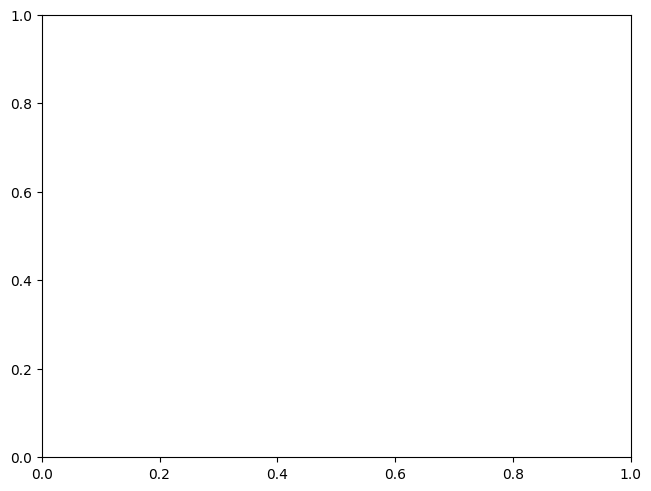

In [841]:
sq.pl.spatial_scatter(adata, shape=None, color="subtype", size=10,palette=color_interaction_anno)

In [1093]:
sq.gr.spatial_neighbors(adata, 
                        library_key = 'sample_id', 
                    coord_type="generic", 
                        delaunay=False, 
                        #radius = radius,
                       n_neighs=9)

/home/youwh/.local/share/r-miniconda/envs/squidpy_spatial/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


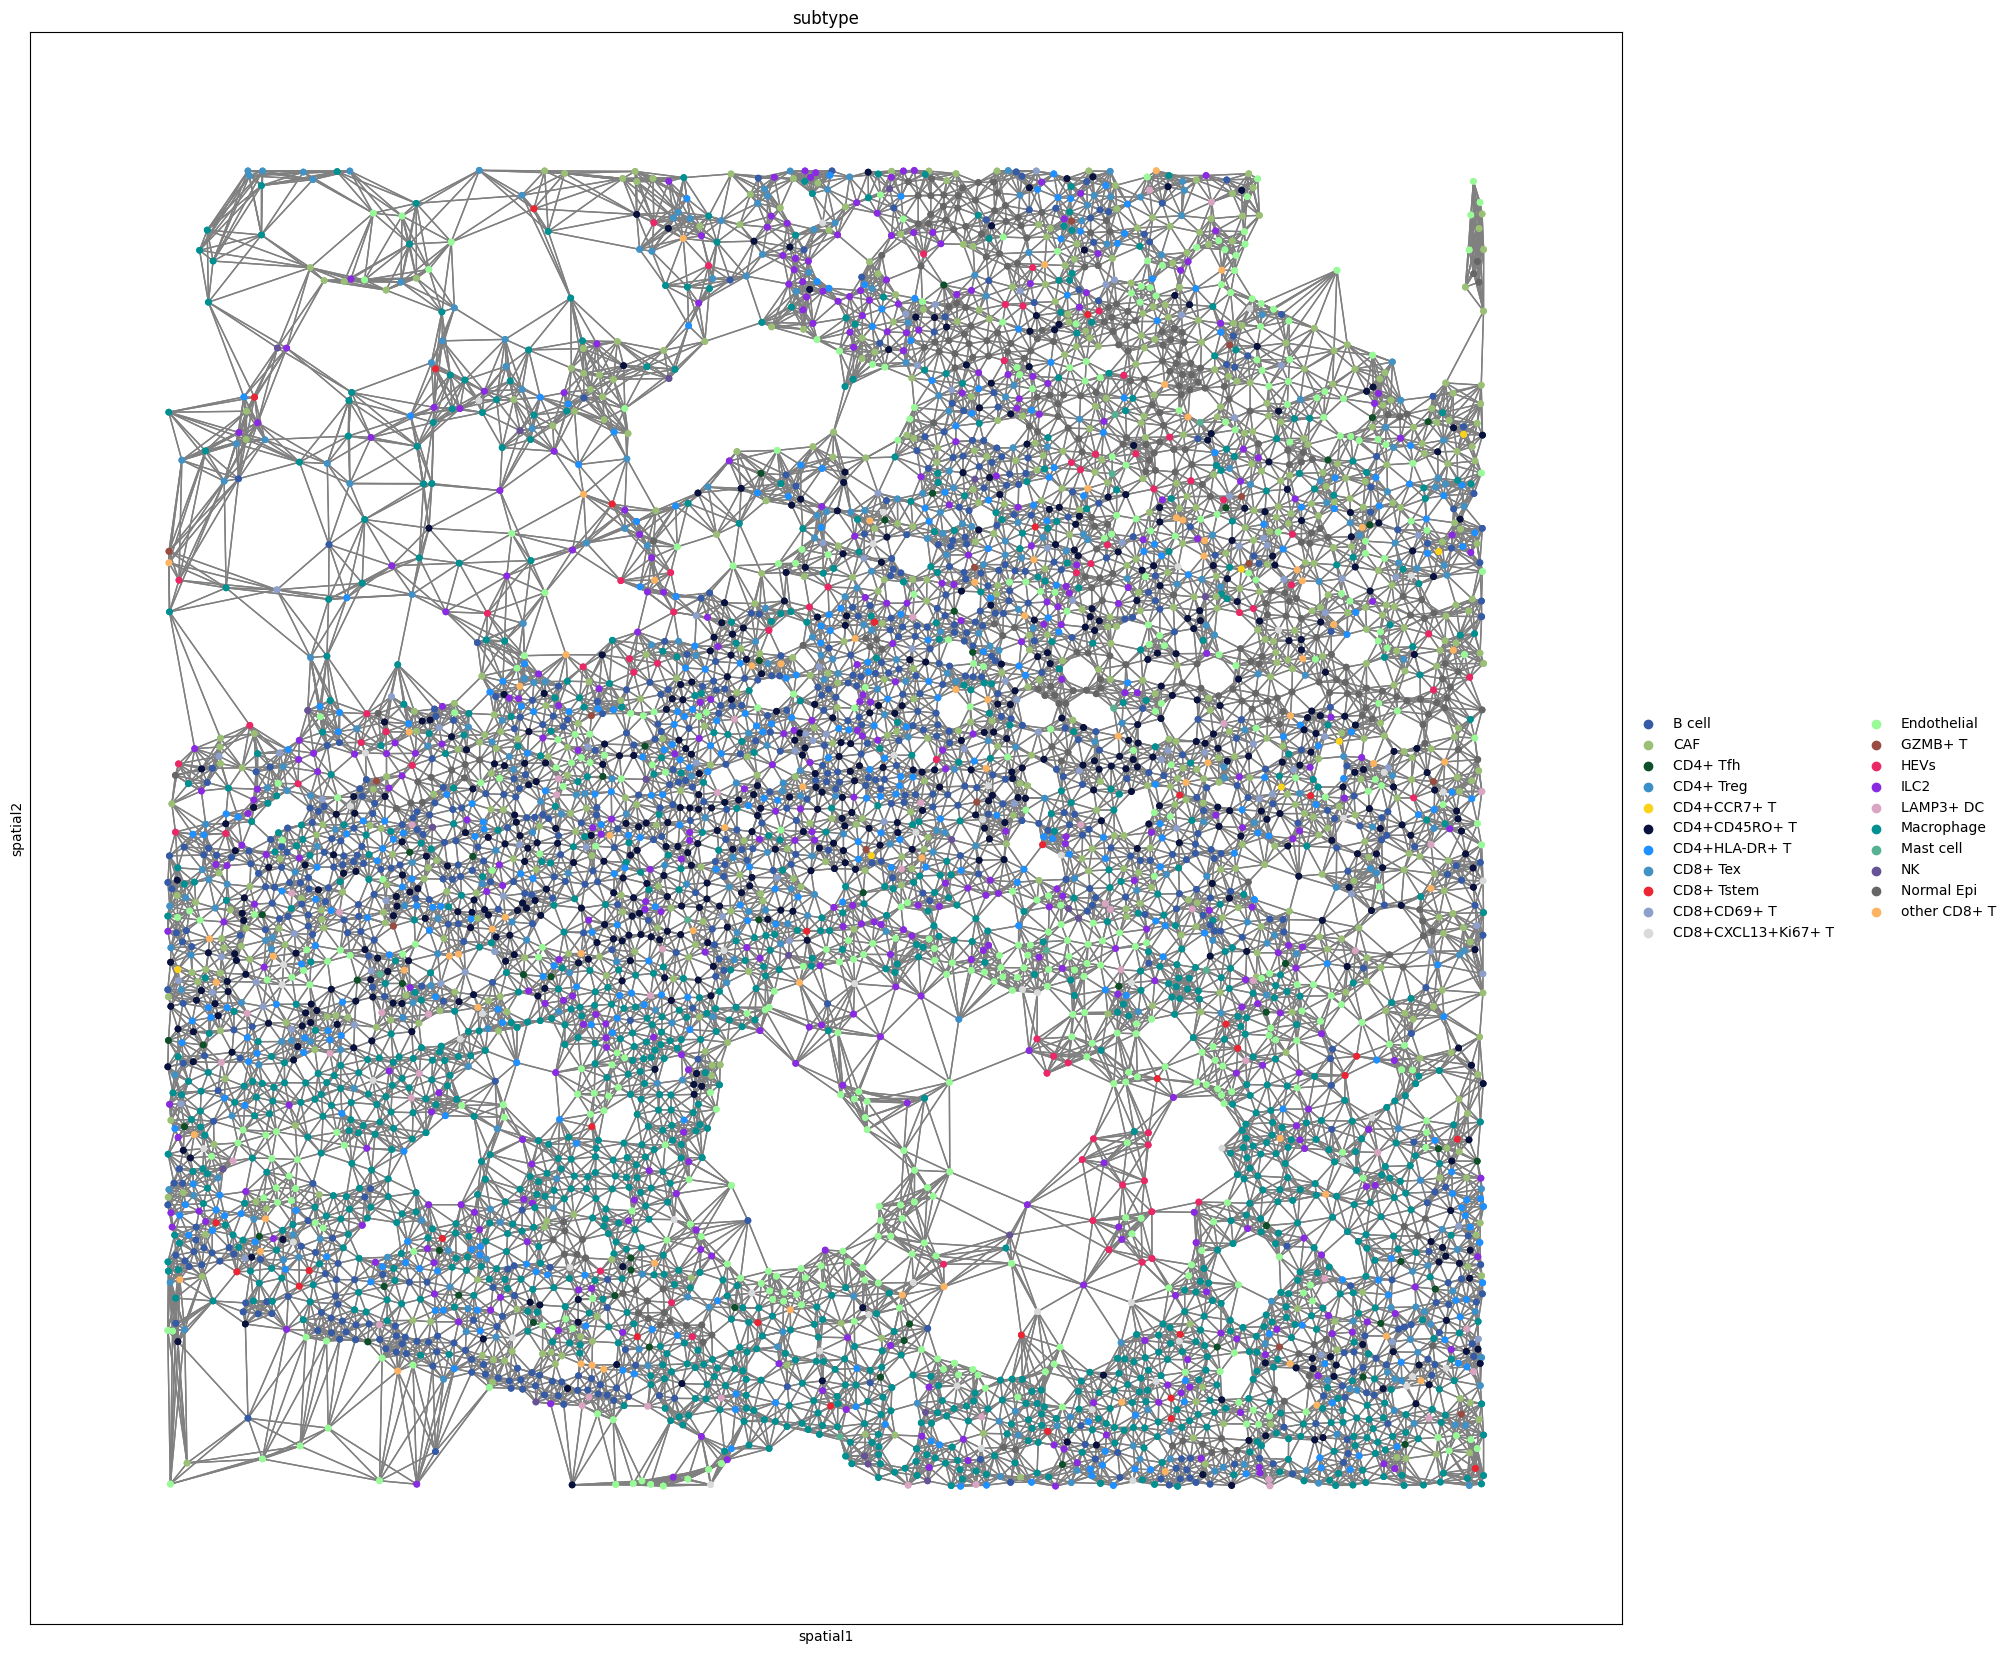

In [1094]:
 sq.pl.spatial_scatter(adata, 
                          color = 'subtype',
                          #coords=adata.obsm['spatial'],
                         # crop_coord=region_subset_dict[sample],
                          size= 60,shape=None,
                          figsize=(20, 20), 
                          connectivity_key = 'spatial_connectivities', 
                         )

In [1095]:
def get_range(list_int):
    import numpy as np

    # Define your list of floats
    data = list_int

    # Determine the range of values in the data set
    data_range = max(data) - min(data)

    # Calculate the bin size based on the desired number of bins
    num_bins = 5
    bin_size = data_range / num_bins

    # Use the histogram function to get the frequency counts and bin edges
    counts, edges = np.histogram(data, bins=num_bins)

    # Create a list of representative integers based on the bin edges
    integers = [int(round(edge)) for edge in edges]

    # Print the results
    print(f"Counts: {counts}")
    print(f"Bin Edges: {integers}") 
    return integers

In [1096]:
from matplotlib.lines import Line2D
from scipy import stats

In [1097]:
adata.obs['subtype'] = adata.obs['subtype'].astype('category')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1998.70/s]


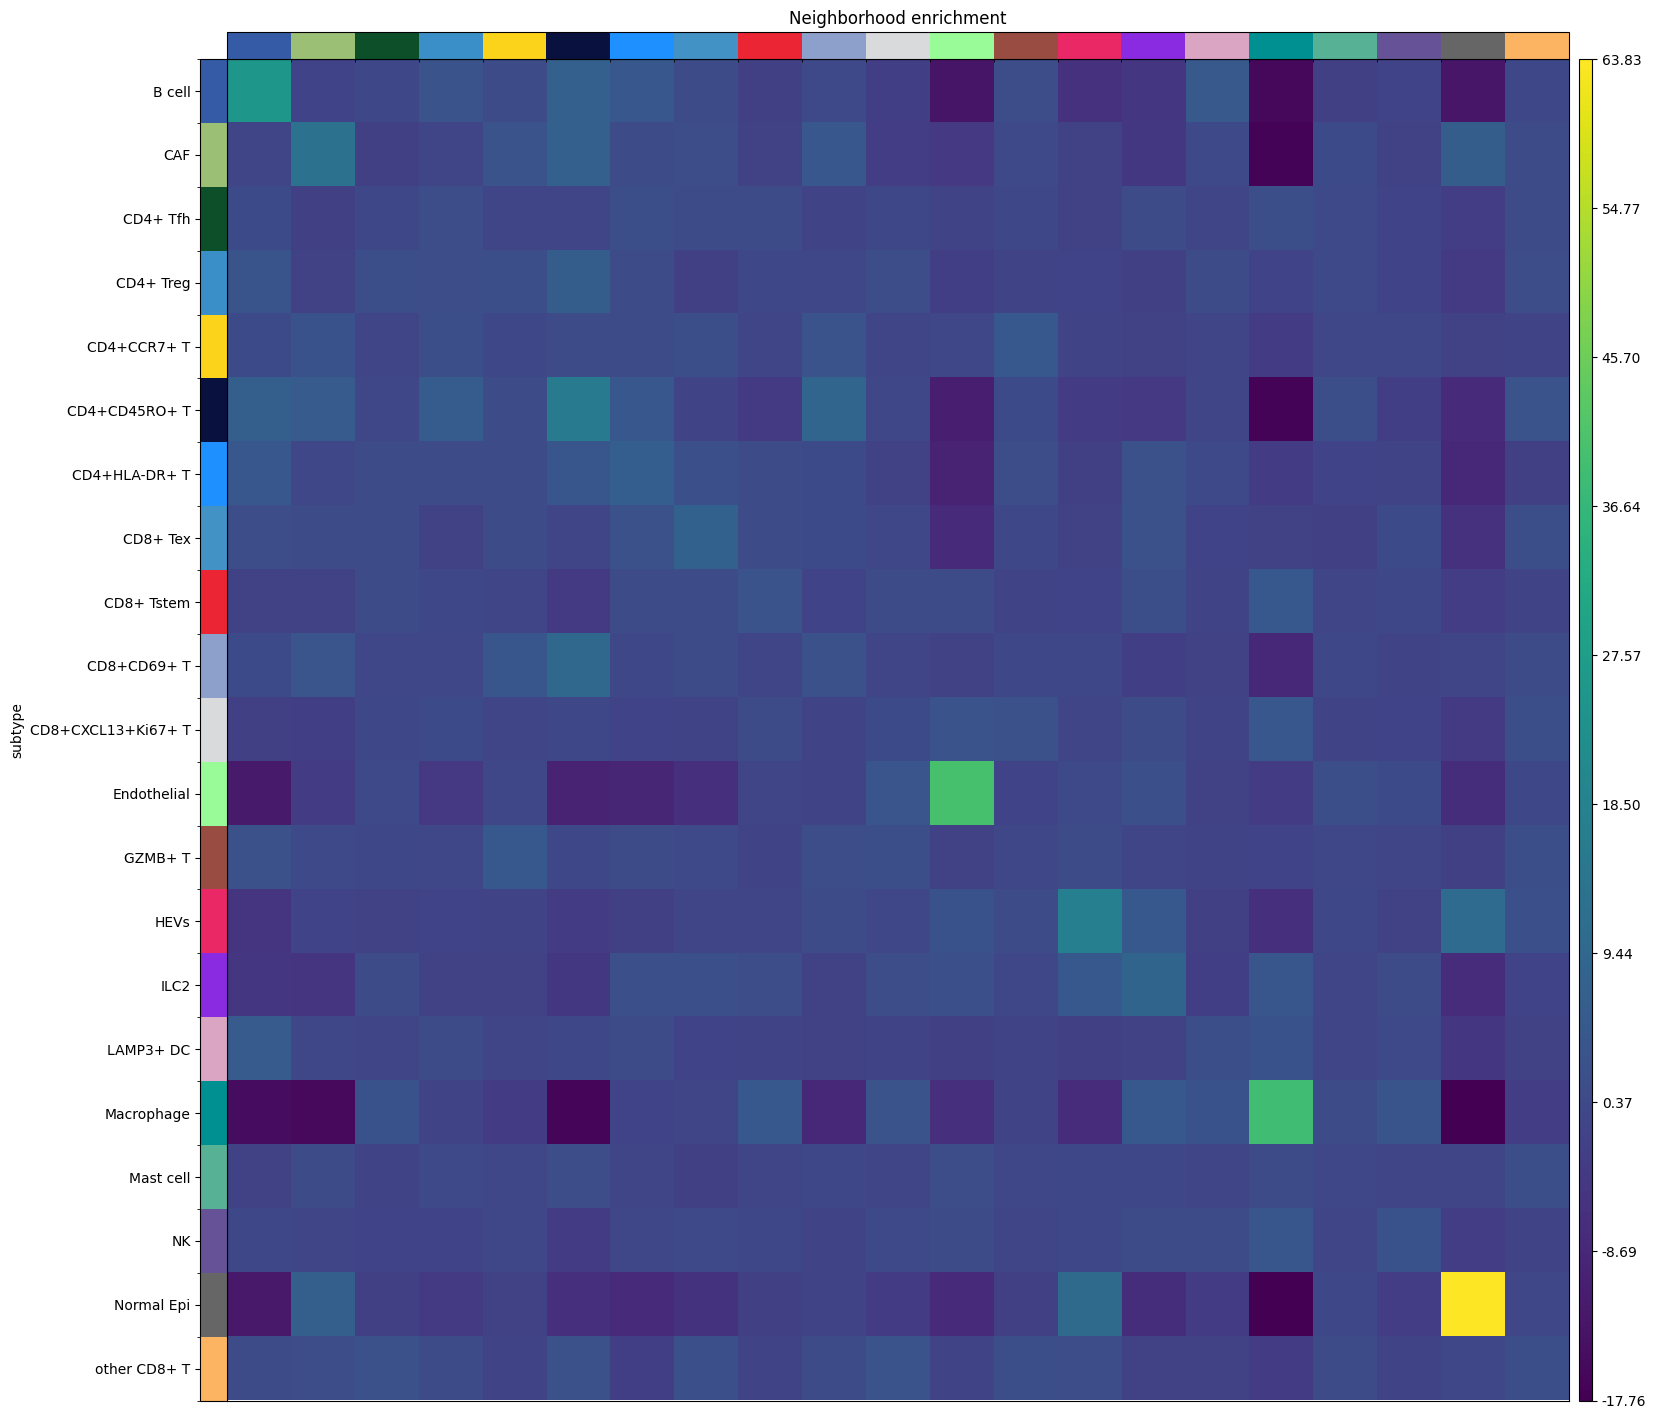

In [1118]:
sq.gr.nhood_enrichment(adata, cluster_key='subtype')
sq.pl.nhood_enrichment(adata, cluster_key='subtype')

In [1119]:
level_='subtype'

In [1120]:
 adata.uns[level_+'_nhood_enrichment']['zscore'] = np.nan_to_num(adata.uns[level_+'_nhood_enrichment']['zscore'])

In [1121]:
 colors =pd.DataFrame(dict(zip(adata.obs['subtype'].cat.categories,adata.uns[level_+'_colors'])).values())

In [1122]:
colors[0]=colors[0].astype(str).str[:7]

In [1123]:
for_eneritz = pd.DataFrame(adata.uns[level_+"_nhood_enrichment"]["zscore"])
for_eneritz.index = adata.obs['subtype'].cat.categories
for_eneritz.columns = adata.obs['subtype'].cat.categories
size = pd.DataFrame(adata.obs[level_].value_counts())
print(size)

                    count
subtype                  
Macrophage           1186
B cell                740
CAF                   677
CD4+CD45RO+ T         548
Endothelial           456
ILC2                  410
CD4+HLA-DR+ T         394
CD8+ Tex              325
Normal Epi            299
CD8+CD69+ T            87
other CD8+ T           76
HEVs                   70
CD4+ Treg              56
CD8+CXCL13+Ki67+ T     53
CD4+ Tfh               53
LAMP3+ DC              48
CD8+ Tstem             32
NK                     20
GZMB+ T                14
Mast cell               9
CD4+CCR7+ T             7


In [1124]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
nodes = adata.obs[level_].cat.categories
categories = pd.DataFrame(adata.obs[level_].cat.categories)
colors['cells'] = categories


In [1125]:
colors

0               cells
0   #355ba7              B cell
1   #9abf75                 CAF
2   #0c4f29            CD4+ Tfh
3   #3b8fc9           CD4+ Treg
4   #fcd31b         CD4+CCR7+ T
5   #09113e       CD4+CD45RO+ T
6   #1e90ff       CD4+HLA-DR+ T
7   #4292c6            CD8+ Tex
8   #eb2533          CD8+ Tstem
9   #8da0cb         CD8+CD69+ T
10  #d8dadc  CD8+CXCL13+Ki67+ T
11  #98fb98         Endothelial
12  #984c42             GZMB+ T
13  #ea2865                HEVs
14  #8a2be2                ILC2
15  #d9a5c2           LAMP3+ DC
16  #019092          Macrophage
17  #56b195           Mast cell
18  #665296                  NK
19  #666666          Normal Epi
20  #fdb462        other CD8+ T

In [1126]:
nodes2 = []
for i,node in enumerate(((nodes))):
    for j in range(i+1, len(nodes)):
        pval = adata.uns[level_+"_nhood_enrichment"]["zscore"][i, j]
        if pval>-1:
            G.add_edge(nodes[i], nodes[j], weight=(pval))

In [1127]:
colors

0               cells
0   #355ba7              B cell
1   #9abf75                 CAF
2   #0c4f29            CD4+ Tfh
3   #3b8fc9           CD4+ Treg
4   #fcd31b         CD4+CCR7+ T
5   #09113e       CD4+CD45RO+ T
6   #1e90ff       CD4+HLA-DR+ T
7   #4292c6            CD8+ Tex
8   #eb2533          CD8+ Tstem
9   #8da0cb         CD8+CD69+ T
10  #d8dadc  CD8+CXCL13+Ki67+ T
11  #98fb98         Endothelial
12  #984c42             GZMB+ T
13  #ea2865                HEVs
14  #8a2be2                ILC2
15  #d9a5c2           LAMP3+ DC
16  #019092          Macrophage
17  #56b195           Mast cell
18  #665296                  NK
19  #666666          Normal Epi
20  #fdb462        other CD8+ T

In [1128]:
size

count
subtype                  
Macrophage           1186
B cell                740
CAF                   677
CD4+CD45RO+ T         548
Endothelial           456
ILC2                  410
CD4+HLA-DR+ T         394
CD8+ Tex              325
Normal Epi            299
CD8+CD69+ T            87
other CD8+ T           76
HEVs                   70
CD4+ Treg              56
CD8+CXCL13+Ki67+ T     53
CD4+ Tfh               53
LAMP3+ DC              48
CD8+ Tstem             32
NK                     20
GZMB+ T                14
Mast cell               9
CD4+CCR7+ T             7

In [1129]:
pos = nx.spring_layout(G,  k=0.2,seed=42)
size = size[size.index.isin(pos.keys())]
size = size.sort_index()

In [1130]:
size

count
subtype                  
B cell                740
CAF                   677
CD4+ Tfh               53
CD4+ Treg              56
CD4+CCR7+ T             7
CD4+CD45RO+ T         548
CD4+HLA-DR+ T         394
CD8+ Tex              325
CD8+ Tstem             32
CD8+CD69+ T            87
CD8+CXCL13+Ki67+ T     53
Endothelial           456
GZMB+ T                14
HEVs                   70
ILC2                  410
LAMP3+ DC              48
Macrophage           1186
Mast cell               9
NK                     20
Normal Epi            299
other CD8+ T           76

In [1131]:
colors = colors[colors.cells.isin(pos.keys())]
colors = dict(zip(colors['cells'], colors[0]))

In [1132]:
colors

{'B cell': '#355ba7',
 'CAF': '#9abf75',
 'CD4+ Tfh': '#0c4f29',
 'CD4+ Treg': '#3b8fc9',
 'CD4+CCR7+ T': '#fcd31b',
 'CD4+CD45RO+ T': '#09113e',
 'CD4+HLA-DR+ T': '#1e90ff',
 'CD8+ Tex': '#4292c6',
 'CD8+ Tstem': '#eb2533',
 'CD8+CD69+ T': '#8da0cb',
 'CD8+CXCL13+Ki67+ T': '#d8dadc',
 'Endothelial': '#98fb98',
 'GZMB+ T': '#984c42',
 'HEVs': '#ea2865',
 'ILC2': '#8a2be2',
 'LAMP3+ DC': '#d9a5c2',
 'Macrophage': '#019092',
 'Mast cell': '#56b195',
 'NK': '#665296',
 'Normal Epi': '#666666',
 'other CD8+ T': '#fdb462'}

In [1133]:
colors

{'B cell': '#355ba7',
 'CAF': '#9abf75',
 'CD4+ Tfh': '#0c4f29',
 'CD4+ Treg': '#3b8fc9',
 'CD4+CCR7+ T': '#fcd31b',
 'CD4+CD45RO+ T': '#09113e',
 'CD4+HLA-DR+ T': '#1e90ff',
 'CD8+ Tex': '#4292c6',
 'CD8+ Tstem': '#eb2533',
 'CD8+CD69+ T': '#8da0cb',
 'CD8+CXCL13+Ki67+ T': '#d8dadc',
 'Endothelial': '#98fb98',
 'GZMB+ T': '#984c42',
 'HEVs': '#ea2865',
 'ILC2': '#8a2be2',
 'LAMP3+ DC': '#d9a5c2',
 'Macrophage': '#019092',
 'Mast cell': '#56b195',
 'NK': '#665296',
 'Normal Epi': '#666666',
 'other CD8+ T': '#fdb462'}

In [1134]:
edge_widths = [d['weight'] for u, v, d in G.edges(data=True)]
size = dict(zip(size.index, size['count']))
node_size = [size[node] for node in G.nodes()]
node_colors = [colors[node] for node in G.nodes()]

Counts: [82 30  9  4  2]
Bin Edges: [-1, 1, 4, 6, 8, 11]


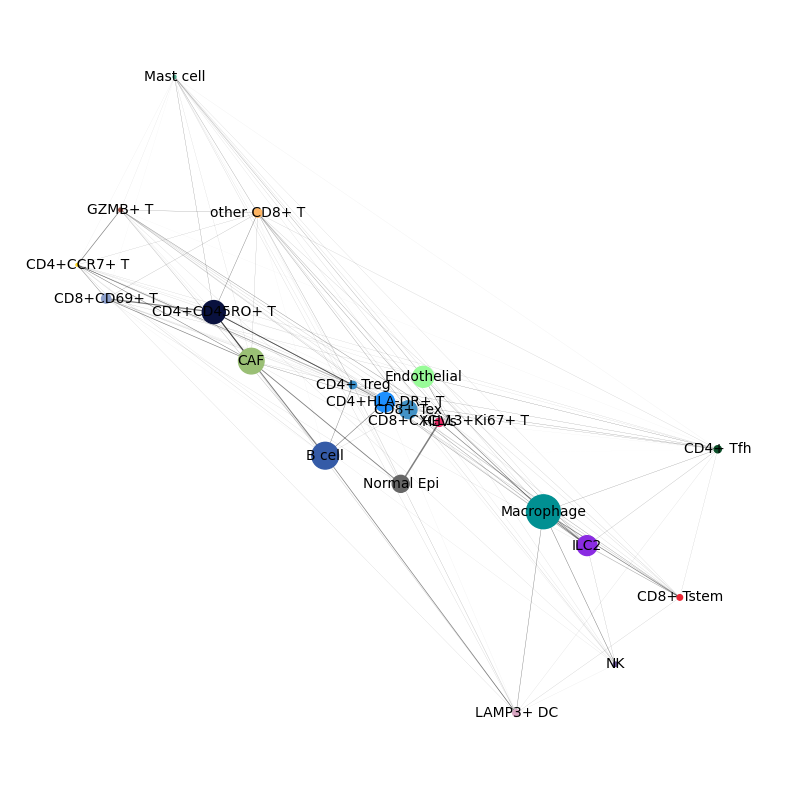

In [1135]:
plt.figure(figsize=(10, 10))
sc = nx.draw_networkx_nodes(G, pos, node_color=node_colors, alpha=1, node_size=np.array(node_size)/2)
nx.draw_networkx_edges(G, pos, edge_color="black", alpha=0.5, width=0.5*(np.array(edge_widths)/5))
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.axis("off")

legend1 = plt.legend(*sc.legend_elements("sizes", num=6),  
                   bbox_to_anchor=(1, 1), 
                   prop={'size': 80},
                   title = '# cells in cluster',
                  frameon = False)



lines = []
edges_weight_list = sorted(np.array(edge_widths))
integers = get_range(edges_weight_list)
for i, width in enumerate(integers):
    lines.append(Line2D([],[], linewidth=0.5*(width/5), color='black'))
legend2 = plt.legend(lines,integers,prop={'size': 20}, bbox_to_anchor=(0, 0.5), frameon=False, ) 
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('R_nhood_enrichment.svg', bbox_inches="tight", dpi = 500)



In [1138]:
sq.gr.interaction_matrix(adata, cluster_key=level_, normalized = False)

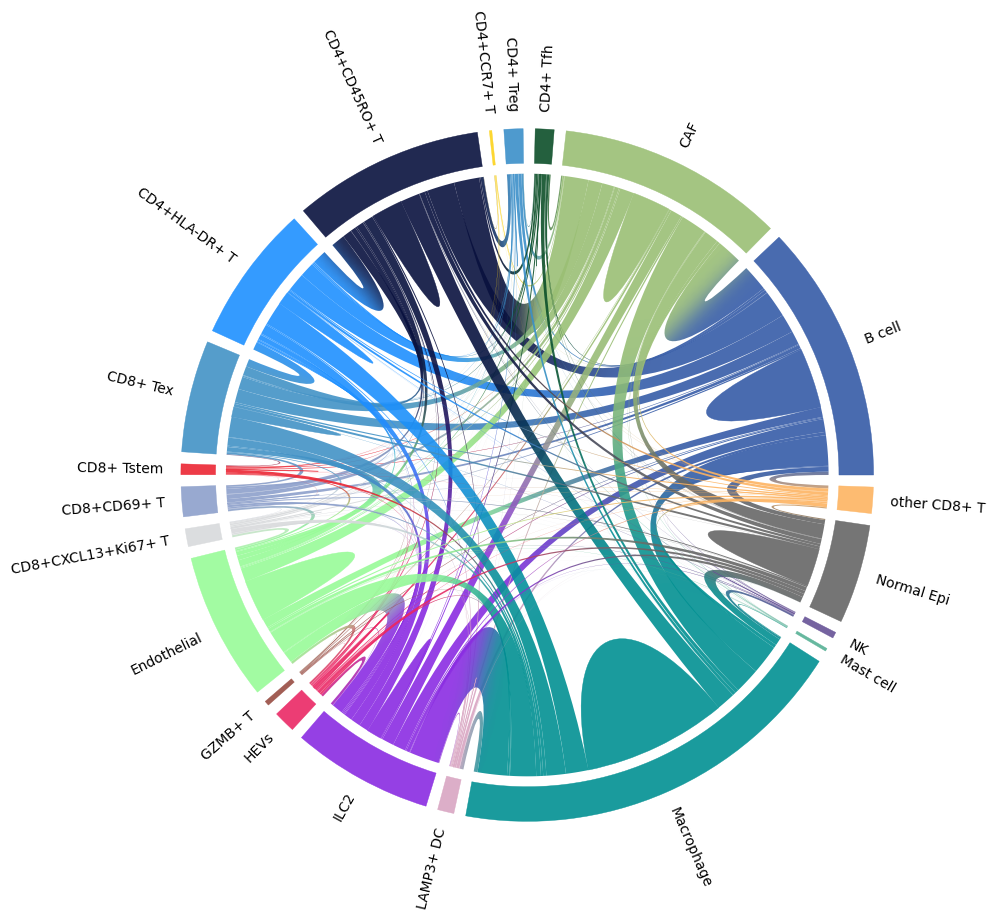

In [1139]:
df = pd.DataFrame(adata.uns[level_+'_interactions'])
df_filt = df#[df.sum() > df.sum().quantile(0.6)]
df_filt = df_filt.T
df_filt = df_filt[df_filt.index.isin(df_filt.columns)]
colors =pd.DataFrame(adata.uns[level_+'_colors'])
colors = colors[colors.index.isin(df_filt.columns)][0]
categories = pd.DataFrame(adata.obs[level_].cat.categories)
categories = categories[categories.index.isin(df_filt.columns)][0]
df_filt.index = categories
df_filt.columns = categories
import random
randomlist = []
for i in range(0,19):
    n = random.uniform(0,1,)
    randomlist.append(n)
        #df.index= adata_int.obs.level3.cat.categories
        #df.columns= adata_int.obs.level3.cat.categories
with plt.rc_context({'figure.figsize': (10, 10), 'figure.dpi':100}):
            chord_diagram(df_filt, names = list(categories), 
                          rotate_names = True, fontcolor = 'black',
                          fontsize=10,colors = list(colors), alpha = 0.90,
                         sort = 'distance', use_gradient= True, show= False)
            plt.rcParams['pdf.fonttype'] = 42
            plt.rcParams['ps.fonttype'] = 42
            plt.rcParams['svg.fonttype'] = 'none'
            plt.savefig('R_interaction_matrix.svg', bbox_inches="tight")
plt.show()